# NumPy and plotting tools

In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns

# Utilities for working with remote data
import requests
from io import BytesIO
import zipfile

# Image processing shortcuts
import imageio

# SciKit-Image tools for working with the image data
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank

# Retrieve zip archive from website, create stream

In [2]:

ctr = requests.get(
    'https://oak-tree.tech/documents/156/example.lung-ct.volume-3d.zip')
ctzip = BytesIO(ctr.content)

# Create a  data in preparation of processing
ct_fdata = zipfile.ZipFile(ctzip)

# Load archived folder of DICOM image data
# The comprehension iterates through images and loads them to a stacked
# NumPy array. The
ct_idata = np.array(
    [imageio.imread(ct_fdata.open(fname)) for fname in ct_fdata.namelist()])

C:\Users\latab\AppData\Local\Temp\ipykernel_10932\3777196406.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  [imageio.imread(ct_fdata.open(fname)) for fname in ct_fdata.namelist()])


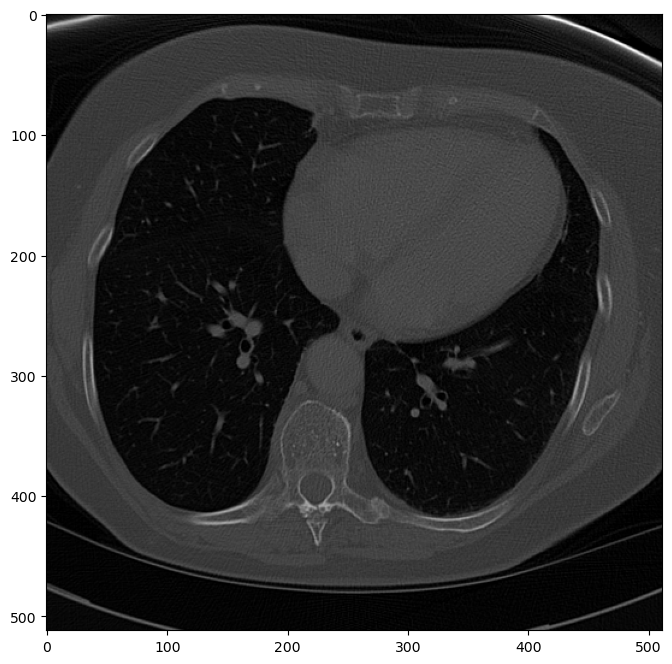

In [3]:
# Show one sample image from the archive
plt.pyplot.figure(figsize=(8, 8), dpi=100)
plt.pyplot.imshow(ct_idata[15,:,:], cmap=plt.cm.gray)

# Helper method to generate panel series of CT image data

In [4]:
def display_series(idata, sstep=5, fcols=3, cmap=plt.cm.gray):
    ''' Create a sample panel to inspect the provided series as a whole.
        Samples images from the sequence based on the provided step.
        @input sstep (int, default=5): Number of images to skip when creating the
            series panel graphic.
        @input fcols (int, default=3): Number of columns to display in the
            panel graphic.
    '''
    frows = idata.shape[0]//sstep//fcols + 1
    
    for i,idx in enumerate(range(0, idata.shape[0], sstep)):
        sub = plt.pyplot.subplot(frows, fcols, i+1)
        sub.imshow(idata[idx,:,:], cmap=cmap)

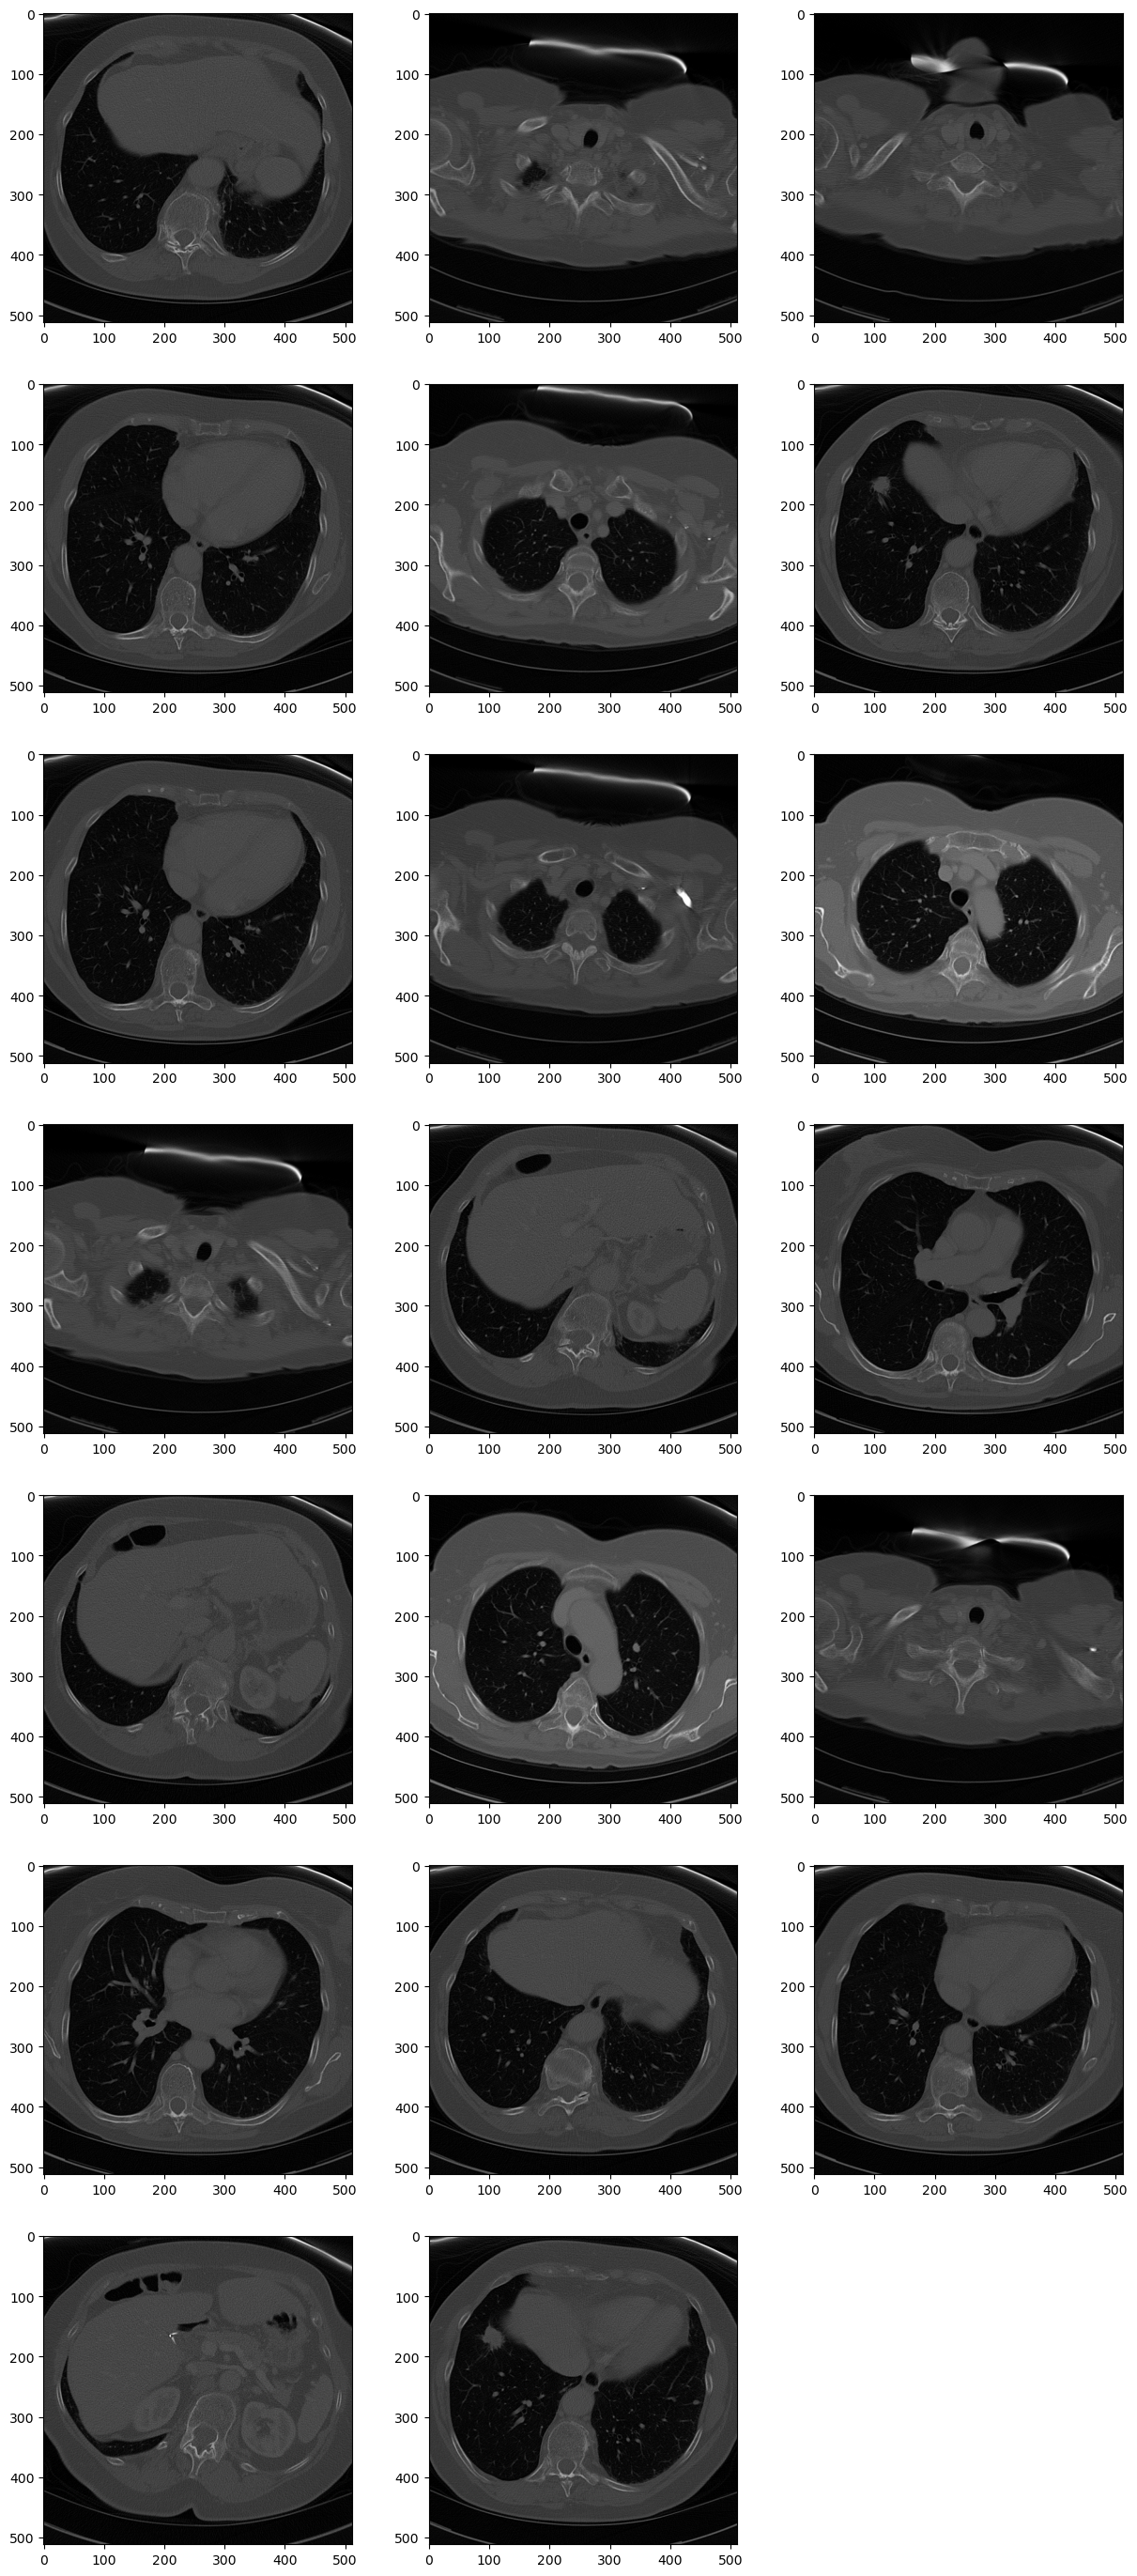

In [5]:
# Create a sample panel to inspect the series as a whole
plt.pyplot.figure(figsize=(15,35))
display_series(ct_idata)